In [1]:
#!pip install transformers datasets

In [1]:
import pandas as pd
import datasets

import torch

In [2]:
data = pd.read_csv('./toy_dataset_label.csv',sep='\t',encoding='latin-1')
print(f'Columns: {[x for x in data.columns]}')

Columns: ['ID', 'FILE', 'AUTHOR', 'BORN-DIED', 'TITLE', 'DATE', 'TECHNIQUE', 'LOCATION', 'FORM', 'TYPE', 'SCHOOL', 'TIMELINE', 'URL']


In [3]:
data.describe()

,ID
count,43455.000000
mean,21728.000000
std,12544.522311
min,1.000000
25%,10864.500000
50%,21728.000000
75%,32591.500000
max,43455.000000


In [4]:
data.head()

,ID,FILE,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,FORM,TYPE,SCHOOL,TIMELINE,URL
0,1,1.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Allegory,1598,"Oil on copper, 56 x 47 cm","Alte Pinakothek, Munich",painting,mythological,German,1601-1650,http://www.wga.hu/html/a/aachen/allegory.html
1,2,2.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)","Bacchus, Ceres and Cupid",-,"Oil on canvas, 163 x 113 cm","Kunsthistorisches Museum, Vienna",painting,mythological,German,1601-1650,http://www.wga.hu/html/a/aachen/bacchus.html
2,3,3.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Joking Couple,-,"Copperplate, 25 x 20 cm","Kunsthistorisches Museum, Vienna",painting,genre,German,1601-1650,http://www.wga.hu/html/a/aachen/j_couple.html
3,4,4.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Portrait of Emperor Rudolf II,1590s,"Oil on canvas, 60 x 48 cm","Kunsthistorisches Museum, Vienna",painting,portrait,German,1601-1650,http://www.wga.hu/html/a/aachen/rudolf2.html
4,5,5.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Self-Portrait with a Glass of Wine,c. 1596,"Oil on canvas, 53 x 44 cm",Private collection,painting,portrait,German,1601-1650,http://www.wga.hu/html/a/aachen/selfport.html


In [5]:
data['SCHOOL'].value_counts()


Italian          18150
French            6804
Dutch             5060
Flemish           3879
German            3553
Spanish           1699
English           1179
Netherlandish      765
Austrian           447
Hungarian          427
Swiss              220
American           200
Russian            180
Danish             114
Scottish           100
Catalan             96
Bohemian            89
Portuguese          87
Belgian             86
Irish               72
Greek               71
Other               57
Swedish             55
Polish              35
Norwegian           25
Finnish              5
Name: SCHOOL, dtype: int64

In [6]:
data['TECHNIQUE'] = data['TECHNIQUE'].str.split(',').str[0]
data['TECHNIQUE'] = data['TECHNIQUE'].str.split(':').str[0]

In [7]:
data['TECHNIQUE'].value_counts()


Oil on canvas                                  13649
Fresco                                          4316
Oil on panel                                    3041
Photo                                           2060
Oil on wood                                     1848
                                               ...  
Pen and black ink with gray wash on paper          1
Red chalk and pencil on paper laid on board        1
Coloured marble relief with bronze                 1
Hand coloured engraving and etching                1
Oil on canvas 250 x 225 cm                         1
Name: TECHNIQUE, Length: 2611, dtype: int64

In [8]:
data['FORM'].value_counts()


painting         30005
sculpture         4767
graphics          3813
architecture      2202
illumination      1557
metalwork          357
mosaic             253
stained-glass      124
furniture          115
tapestry           111
ceramics           105
glassware           37
others               9
Name: FORM, dtype: int64

In [9]:
import requests
from bs4 import BeautifulSoup,Comment
import numpy as np

def get_description(url):    
    r = requests.get(url)
    html_content = r.text

    soup = BeautifulSoup(html_content,'html.parser')

    comment = soup.find(string=lambda text: isinstance(text,Comment))
    if not comment:
        print('culo')
        return 0
    
    parent_element = comment.find_parent()
    p_tag=parent_element.find('p')
    text_content = ''.join(p_tag.stripped_strings)
    return text_content

In [10]:
data = data[:700]

In [11]:
from tqdm import tqdm

with tqdm(total=len(data)) as pbar:
    for idx in range(data.shape[0]):
        pbar.set_description(f'Art Piece N°: {idx}')
        data['FILE'][idx] = './images/'+str(idx+1)+'.jpg'
        #data['URL'][idx] = get_description(data['URL'][idx])
        pbar.update()


Art Piece N°: 1:   0%|                                                               | 1/700 [00:00<00:00, 1000.31it/s]C:\Users\the_s\AppData\Local\Temp\ipykernel_6124\611402723.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FILE'][idx] = './images/'+str(idx+1)+'.jpg'
Art Piece N°: 699: 100%|███████████████████████████████████████████████████████████| 700/700 [00:00<00:00, 1355.23it/s]


In [12]:
data.head()

,ID,FILE,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,FORM,TYPE,SCHOOL,TIMELINE,URL
0,1,./images/1.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Allegory,1598,Oil on copper,"Alte Pinakothek, Munich",painting,mythological,German,1601-1650,http://www.wga.hu/html/a/aachen/allegory.html
1,2,./images/2.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)","Bacchus, Ceres and Cupid",-,Oil on canvas,"Kunsthistorisches Museum, Vienna",painting,mythological,German,1601-1650,http://www.wga.hu/html/a/aachen/bacchus.html
2,3,./images/3.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Joking Couple,-,Copperplate,"Kunsthistorisches Museum, Vienna",painting,genre,German,1601-1650,http://www.wga.hu/html/a/aachen/j_couple.html
3,4,./images/4.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Portrait of Emperor Rudolf II,1590s,Oil on canvas,"Kunsthistorisches Museum, Vienna",painting,portrait,German,1601-1650,http://www.wga.hu/html/a/aachen/rudolf2.html
4,5,./images/5.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Self-Portrait with a Glass of Wine,c. 1596,Oil on canvas,Private collection,painting,portrait,German,1601-1650,http://www.wga.hu/html/a/aachen/selfport.html


In [13]:
data['TITLE'] = data['TITLE'].astype(str)
data['URL'] = data['URL'].astype(str)


In [14]:
data = data[data['FORM'] == 'painting']
data['CAPTION'] = data['TITLE'] + ': ' + data['URL']
data.head()

,ID,FILE,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,FORM,TYPE,SCHOOL,TIMELINE,URL,CAPTION
0,1,./images/1.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Allegory,1598,Oil on copper,"Alte Pinakothek, Munich",painting,mythological,German,1601-1650,http://www.wga.hu/html/a/aachen/allegory.html,Allegory: http://www.wga.hu/html/a/aachen/alle...
1,2,./images/2.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)","Bacchus, Ceres and Cupid",-,Oil on canvas,"Kunsthistorisches Museum, Vienna",painting,mythological,German,1601-1650,http://www.wga.hu/html/a/aachen/bacchus.html,"Bacchus, Ceres and Cupid: http://www.wga.hu/ht..."
2,3,./images/3.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Joking Couple,-,Copperplate,"Kunsthistorisches Museum, Vienna",painting,genre,German,1601-1650,http://www.wga.hu/html/a/aachen/j_couple.html,Joking Couple: http://www.wga.hu/html/a/aachen...
3,4,./images/4.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Portrait of Emperor Rudolf II,1590s,Oil on canvas,"Kunsthistorisches Museum, Vienna",painting,portrait,German,1601-1650,http://www.wga.hu/html/a/aachen/rudolf2.html,Portrait of Emperor Rudolf II: http://www.wga....
4,5,./images/5.jpg,"AACHEN, Hans von","(b. 1552, KÃ¶ln, d. 1615, Praha)",Self-Portrait with a Glass of Wine,c. 1596,Oil on canvas,Private collection,painting,portrait,German,1601-1650,http://www.wga.hu/html/a/aachen/selfport.html,Self-Portrait with a Glass of Wine: http://www...


### Image Captioning

In [40]:
features = ['FILE','CAPTION']
train_data = data[data['URL'] != 0]
train_data = data[features]

In [41]:
train_data.head()

,FILE,CAPTION
0,./images/1.jpg,Allegory: http://www.wga.hu/html/a/aachen/alle...
1,./images/2.jpg,"Bacchus, Ceres and Cupid: http://www.wga.hu/ht..."
2,./images/3.jpg,Joking Couple: http://www.wga.hu/html/a/aachen...
3,./images/4.jpg,Portrait of Emperor Rudolf II: http://www.wga....
4,./images/5.jpg,Self-Portrait with a Glass of Wine: http://www...


In [42]:
train_data = train_data.rename(columns={'FILE':'image','CAPTION':'description'})
train_dataset = datasets.Dataset.from_dict(train_data).cast_column('image',datasets.Image())
print(train_dataset)

Dataset({
    features: ['image', 'description'],
    num_rows: 486
})


In [43]:
train_dataset['image']

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=708x827>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=723x1040>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=686x940>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=820x1023>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=896x1074>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1200x818>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=875x950>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=637x1060>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=900x1328>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1156x761>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=858x680>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=939x820>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=820x907>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1023x350>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1137x850>,
 

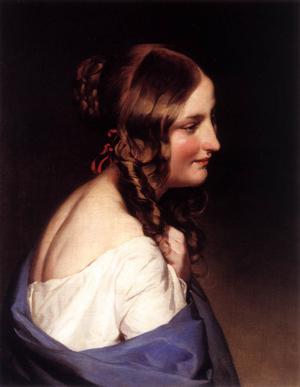

Description: From the early 1830s to approximately 1850 Amerling was Vienna's most celebrated portraitist. A likeness, almost identical to this portrait and entitled Modest Susanna, was executed in 1837.The portrait represents an example of one of Amerling's favourite compositional schemata to position the bare-backed sitter, turned away from the beholder. Effective highlights lend a soft gleam to the young face and betray the influence ofThomas Lawrence's art of portraiture.


In [13]:
sample = train_dataset[260]

image = sample['image']
height,width = image.size
display(image.resize((int(0.3*height),int(0.3*width))))
caption = sample['description']
print(f'Description: {caption}')

In [14]:
from torch.utils.data import Dataset

class ImageCaptioningDataset(Dataset):
    
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        encoding = self.processor(images=item["image"], text=item["description"], padding="max_length", return_tensors="pt", truncation=True)
        # remove batch dimension
        encoding = {k:v.squeeze() for k,v in encoding.items()}
        return encoding

In [15]:
from transformers import AutoProcessor

processor_capt = AutoProcessor.from_pretrained("microsoft/git-base")

In [16]:
encoded_dataset = ImageCaptioningDataset(train_dataset, processor_capt)

In [17]:
item = encoded_dataset[0]
for k,v in item.items():
    print(k,v.shape)

input_ids torch.Size([512])
attention_mask torch.Size([512])
pixel_values torch.Size([3, 224, 224])


In [18]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(encoded_dataset,shuffle=True,batch_size=4)

In [19]:
batch = next(iter(train_dataloader))
for k,v in batch.items():
    print(k,v.shape)

input_ids torch.Size([4, 512])
attention_mask torch.Size([4, 512])
pixel_values torch.Size([4, 3, 224, 224])


In [20]:
processor_capt.decode(batch['input_ids'][0])

'[CLS] the figure of the madonna, wrought into a composed chiasmus in order to balance the weight of the child, lights up the centre of the picture with the intense rose - colour of her robe tempered by harmony with the pale blue of her mantle, and with the brilliant yellow of the light fabric draped over her shoulders beneath the beautiful drapery of the white veil covering her head. for centuries - ever since a jjudgment by vasari - the work was considered to be the prototype of classicism instilled into religious subjects, a refined synthesis of leonardesque ` sfumato \', raphaelesque balance, and plastic monumentality in the style of michelangelo. andrea del sarto, who vasari dubbed the " painter without errors ", gives here a typical example of intellectual religiousness of clear neo - platonic derivation. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PA

In [21]:
from transformers import AutoModelForCausalLM

model_capt = AutoModelForCausalLM.from_pretrained('microsoft/git-base')

In [22]:
outputs = model_capt(input_ids=batch['input_ids'],
                attention_mask=batch['attention_mask'],
                pixel_values=batch['pixel_values'],
                labels=batch['input_ids'])

outputs.loss

tensor(9.6242, grad_fn=<NllLossBackward0>)

In [23]:
import torch

optimizer = torch.optim.AdamW(model.parameters(),lr=5e-5)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_capt.to(device)

model_capt.train()

for epoch in range(7):
    print('Epoch:',epoch)
    for idx, batch in enumerate(train_dataloader):
        input_ids = batch.pop('input_ids').to(device)
        pixel_values=batch.pop('pixel_values').to(device)

        outputs = model_capt(input_ids=input_ids,
                        pixel_values=pixel_values,
                        labels = input_ids)
        loss = outputs.loss

        print('Loss: ', loss.item())

        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

Epoch: 0
Loss:  11.317154884338379
Loss:  10.206398010253906
Loss:  9.985786437988281
Loss:  9.596288681030273
Loss:  9.309513092041016
Loss:  9.268410682678223
Loss:  9.009773254394531
Loss:  8.435033798217773
Loss:  8.373270034790039
Loss:  8.427693367004395
Loss:  8.414093971252441
Loss:  8.352570533752441
Loss:  8.205241203308105
Loss:  8.244383811950684
Loss:  7.833899021148682
Loss:  7.548210144042969
Loss:  7.881239891052246
Loss:  7.606909275054932
Loss:  7.255744934082031
Loss:  7.310644149780273
Loss:  7.4804863929748535
Loss:  7.262294292449951
Loss:  7.162161350250244
Loss:  6.879047393798828
Loss:  7.122913360595703
Loss:  7.073440074920654
Loss:  6.625791549682617
Loss:  6.773158073425293
Loss:  6.754545211791992
Loss:  6.547958850860596
Loss:  6.457469463348389
Loss:  6.356750011444092
Loss:  6.303451061248779
Loss:  6.162021636962891
Loss:  6.211362838745117
Loss:  6.050029277801514
Loss:  5.987717151641846
Loss:  5.819694519042969
Loss:  5.83638334274292
Loss:  5.64779

Loss:  0.8463959097862244
Loss:  0.3326893448829651
Loss:  1.3694989681243896
Loss:  0.9114410877227783
Loss:  1.909346342086792
Loss:  0.7517231106758118
Loss:  1.4007269144058228
Loss:  0.3314227759838104
Loss:  0.8927987217903137
Loss:  1.358635425567627
Loss:  0.7562404274940491
Loss:  1.3086152076721191
Loss:  0.6929579973220825
Loss:  0.5518935322761536
Loss:  0.5893802642822266
Loss:  0.7770295143127441
Loss:  0.714125394821167
Loss:  1.292736291885376
Loss:  0.9330989718437195
Loss:  1.33326256275177
Loss:  0.4200838804244995
Loss:  1.0330801010131836
Loss:  0.5801101326942444
Loss:  0.9411411285400391
Loss:  0.497274786233902
Loss:  0.37052109837532043
Loss:  1.091528058052063
Loss:  1.7497625350952148
Loss:  1.657826542854309
Loss:  1.0418431758880615
Loss:  0.9167008996009827
Loss:  0.9369158148765564
Loss:  0.5716959238052368
Loss:  1.3247777223587036
Loss:  0.979066789150238
Loss:  0.5087171196937561
Loss:  0.7668989300727844
Loss:  1.2688183784484863
Loss:  0.991424858570

Loss:  0.38505569100379944
Loss:  0.3709500730037689
Loss:  0.19126805663108826
Loss:  0.416553258895874
Loss:  0.29998642206192017
Loss:  0.75328528881073
Loss:  0.17874810099601746
Loss:  0.4476764500141144
Loss:  0.6990062594413757
Loss:  1.020658254623413
Loss:  0.5857757329940796
Loss:  0.5661212205886841
Loss:  0.7508755922317505
Loss:  0.21171584725379944
Loss:  0.32050177454948425
Loss:  0.41779884696006775
Loss:  0.8117685317993164
Loss:  0.5521947145462036
Loss:  0.1945829689502716
Loss:  0.6880066394805908
Loss:  0.6787990927696228
Loss:  0.6225928068161011
Loss:  0.8205494284629822
Loss:  0.6213184595108032
Loss:  0.1505654752254486
Loss:  0.7262417078018188
Loss:  0.4213796854019165
Loss:  0.5109447240829468
Loss:  0.2066338062286377
Loss:  0.8052225112915039
Loss:  0.24309810996055603
Loss:  1.2858483791351318
Loss:  0.38181301951408386
Loss:  0.7145289778709412
Loss:  0.43159499764442444
Loss:  0.9809190034866333
Loss:  0.305122971534729
Loss:  0.2841847240924835
Loss:  

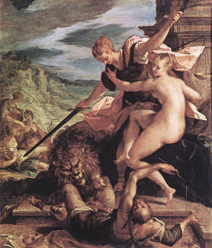

The painting, displaying the characteristic Mannerist style of the artist, is also known as The Triumph of Justice.


In [31]:
sample = train_dataset[0]
image = sample['image']
desc = sample['description']
height,width = image.size
display(image.resize((int(0.3*height),int(0.3*width))))
print(desc)

In [30]:
inputs = processor_capt(images = image, return_tensors='pt').to(device)
pixel_values = inputs.pixel_values

generated_ids = model_capt.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor_capt.batch_decode(generated_ids,skip_special_tokens=True)[0]
print(generated_caption)

the painting is a still - life version of a still - life with a bunch of flowers, a bunch of grapes and leaves, a bunch of grapes in the foreground. the picture shows a dark background is a natural light that still - life


### Author Classification

In [15]:
features = ['FILE','AUTHOR']

train_data_class = data[features]
train_data_class.dropna()
train_data_class = train_data_class[train_data_class['AUTHOR'] != 0]
train_data_class.head()

,FILE,AUTHOR
0,./images/1.jpg,"AACHEN, Hans von"
1,./images/2.jpg,"AACHEN, Hans von"
2,./images/3.jpg,"AACHEN, Hans von"
3,./images/4.jpg,"AACHEN, Hans von"
4,./images/5.jpg,"AACHEN, Hans von"


In [16]:
train_data_class['AUTHOR'].value_counts()

ANDREA DEL SARTO            59
ANDREA DEL CASTAGNO         47
ANDREA DA FIRENZE           46
ALTDORFER, Albrecht         33
ALBANI, Francesco           26
                            ..
ALT, Rudolf von              1
ALCIBAR, JosÃ© de            1
ALEKSANDROVIÃ, Ljubomir     1
ALLSTON, Washington          1
ANGELICO, Fra                1
Name: AUTHOR, Length: 65, dtype: int64

In [17]:
labels = train_data_class['AUTHOR'].unique()

In [18]:
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

In [19]:
train_data_class = train_data_class.rename(columns={'FILE':'image','AUTHOR':'label'})
train_data_class['label'] = train_data_class['label'].map(label2id)
train_dataset_class = datasets.Dataset.from_dict(train_data_class).cast_column('image',datasets.Image())
print(train_dataset_class)

Dataset({
    features: ['image', 'label'],
    num_rows: 486
})


In [20]:
train_dataset_class['image']

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=708x827>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=723x1040>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=686x940>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=820x1023>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=896x1074>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1200x818>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=875x950>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=637x1060>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=900x1328>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1156x761>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=858x680>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=939x820>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=820x907>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1023x350>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1137x850>,
 

In [21]:
from transformers import AutoImageProcessor

checkpoint_class = "google/vit-base-patch16-224-in21k"
image_processor = AutoImageProcessor.from_pretrained(checkpoint_class)

In [22]:
from torchvision.transforms import RandomResizedCrop, Compose, Normalize, ToTensor

normalize = Normalize(mean=image_processor.image_mean, std=image_processor.image_std)
size = (
    image_processor.size["shortest_edge"]
    if "shortest_edge" in image_processor.size
    else (image_processor.size["height"], image_processor.size["width"])
)
_transforms = Compose([RandomResizedCrop(size), ToTensor(), normalize])

In [23]:
def transforms(examples):
    examples["pixel_values"] = [_transforms(img.convert("RGB")) for img in examples["image"]]
    #del examples["image"]
    return examples

In [24]:
train_dataset_class = train_dataset_class.with_transform(transforms)

In [25]:
train_dataset_class

Dataset({
    features: ['image', 'label'],
    num_rows: 486
})

In [26]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator()

In [27]:
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [28]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    checkpoint_class,
    num_labels=len(labels),
    id2label=id2label,
    label2id=label2id,
)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.weight', 'pooler.dense.bias']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

training_args = TrainingArguments(
    output_dir="artesttt",
    remove_unused_columns=False,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=8,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset_class,
    #eval_dataset=food["test"],
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
)

trainer.train()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ C:\Users\the_s\AppData\Local\Temp\ipykernel_6124\3815565108.py:30 in <module>                    │
│                                                                                                  │
│ [Errno 2] No such file or directory:                                                             │
│ 'C:\\Users\\the_s\\AppData\\Local\\Temp\\ipykernel_6124\\3815565108.py'                          │
│                                                                                                  │
│ C:\Users\the_s\anaconda3\lib\site-packages\transformers\trainer.py:1664 in train                 │
│                                                                                                  │
│   1661 │   │   inner_training_loop = find_executable_batch_size(                                 │
│   1662 │   │   │   self._inner_training_loop, self._train_batch_size, args.auto_find_batch_size  │
│   1663 │   │   )                                                                                 │
│ ❱ 1664 │   │   return inner_training_loop(                                                       │
│   1665 │   │   │   args=args,                                                                    │
│   1666 │   │   │   resume_from_checkpoint=resume_from_checkpoint,                                │
│   1667 │   │   │   trial=trial,                                                                  │
│                                                                                                  │
│ C:\Users\the_s\anaconda3\lib\site-packages\transformers\trainer.py:1901 in _inner_training_loop  │
│                                                                                                  │
│   1898 │   │   │   │   rng_to_sync = True                                                        │
│   1899 │   │   │                                                                                 │
│   1900 │   │   │   step = -1                                                                     │
│ ❱ 1901 │   │   │   for step, inputs in enumerate(epoch_iterator):                                │
│   1902 │   │   │   │   total_batched_samples += 1                                                │
│   1903 │   │   │   │   if rng_to_sync:                                                           │
│   1904 │   │   │   │   │   self._load_rng_state(resume_from_checkpoint)                          │
│                                                                                                  │
│ C:\Users\the_s\anaconda3\lib\site-packages\torch\utils\data\dataloader.py:681 in __next__        │
│                                                                                                  │
│    678 │   │   │   if self._sampler_iter is None:                                                │
│    679 │   │   │   │   # TODO(https://github.com/pytorch/pytorch/issues/76750)                   │
│    680 │   │   │   │   self._reset()  # type: ignore[call-arg]                                   │
│ ❱  681 │   │   │   data = self._next_data()                                                      │
│    682 │   │   │   self._num_yielded += 1                                                        │
│    683 │   │   │   if self._dataset_kind == _DatasetKind.Iterable and \                          │
│    684 │   │   │   │   │   self._IterableDataset_len_called is not None and \                    │
│                                                                                                  │
│ C:\Users\the_s\anaconda3\lib\site-packages\torch\utils\data\dataloader.py:721 in _next_data      │
│                                                                                                  │
│    718 │                                                                                         │
│    719 │   def _next_data(self):                           

In [31]:
!pip install --upgrade pillow==8.2



     ---------------------------------------- 2.2/2.2 MB 2.5 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.2.0
    Uninstalling Pillow-9.2.0:
      Successfully uninstalled Pillow-9.2.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.19.3 requires pillow>=8.3.2, but you have pillow 8.2.0 which is incompatible.
allennlp 2.10.1 requires transformers<4.21,>=4.1, but you have transformers 4.29.0.dev0 which is incompatible.
